# Orchestrator-Workers Workflow
# In this workflow, a central LLM dynamically breaks down tasks, delegates them to worker LLMs, and synthesizes their results.

# When to use this workflow
# This workflow is well-suited for complex tasks where you can't predict the subtasks needed. The key difference from simple parallelization is its flexibility—subtasks aren't pre-defined, but determined by the orchestrator based on the specific input.

In [2]:
%pip install -qU langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: uvicorn 0.14.0 has a non-standard dependency specifier click>=7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of uvicorn or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GEMINI_API_KEY")

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest")



# Let's switch to python now for creating better systems.

In [3]:
n=input("Enter the query on which you want to perform the task:")

orchestrator_prompt=f"""
You are an manager of a company who needs to allocate tasks to workers.
You are given a task: {n}
You have 3 workers available.

worker1 is a sentiment analysis expert.
worker2 is a classification expert which can classify the text into technical,product,marketing,sales,finance,etc
worker3 is a summarization expert.

Return the output in the following format in XML format(strictly follow the format, nothing else should be outputed):

<worker1>
Actual Task: (Eg- "Analyze the sentiment of the text")
</worker1>
<worker2>
Actual Task: (Eg- "Classify the text into who should be assigned to this ticket from technical,product,marketing,sales,finance,etc")
</worker2>
<worker3>
Actual Task: (Eg- "Summarize the text")
</worker3>
"""

def extract_worker1_task(text):
    return text.split("worker1")[1].split("</worker1>")[0].strip()

def extract_worker2_task(text):
    return text.split("worker2")[1].split("</worker2>")[0].strip()

def extract_worker3_task(text):
    return text.split("worker3")[1].split("</worker3>")[0].strip()

result=llm.invoke(orchestrator_prompt)

In [15]:
print(result.content.split('```')[1].split('<worker1>')[1].split("/worker1")[0].split("<")[0].strip())

Actual Task: Analyze the sentiment expressed in the bill-related text ("my bill is very high"). Determine if the sentiment is negative, positive, or neutral.


# Rough work(please ignore)

In [2]:
a=str(
    ```xml

<md_file>

# Sales Prediction for 2025

## Project Description

This project involved developing a machine learning model to predict sales for the year 2025 for a client.

## Methodology

A machine learning model was developed to predict sales for the year 2025.  Specifically, an XGBoost model was trained using historical sales data and relevant features.  

## Tech Stack

* Python

* scikit-learn

* XGBoost

## Other Notes

The primary focus of this project was on feature engineering to ensure the model was trained with high-quality, informative features.  Model optimization was a secondary concern. The XGBoost model was trained using Python and scikit-learn libraries.

## Mermaid Chart

```mermaid

graph LR

A[Project: Sales Prediction for 2025] --> B(Model Training);

B --> C{XG Boost};

C --> D[Python, sklearn];

B --> E(Feature Engineering);

E --> F(Focus);

```

## URLs

None.

</md_file>

```)

SyntaxError: invalid syntax (2346643313.py, line 2)

In [1]:
import pandas as pd
import numpy as np

# Step 1: Create a sample dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'Age': [25, 30, 35, np.nan, 29],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Female'],
    'Salary': [50000, 60000, 80000, 100000, 55000],
    'Experience (Years)': [2, 5, 7, 10, 4],
    'Location': ['Urban', 'Urban', 'Rural', 'Urban', 'Rural']
}
df = pd.DataFrame(data)

# Step 2: Handle Missing Values
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Step 3: Encode Categorical Data
df_encoded = pd.get_dummies(df, columns=['Gender', 'Location'], drop_first=True)

# Step 4: Create New Features
df_encoded['Salary_per_Experience'] = df_encoded['Salary'] / df_encoded['Experience (Years)']

# Step 5: Apply Polynomial Features
df_encoded['Age_squared'] = df_encoded['Age'] ** 2

# Step 6: Log Transformation
df_encoded['Log_Salary'] = np.log(df_encoded['Salary'])

# Display results
print("\nOriginal Dataset:")
print(df)

print("\nFeature-Engineered Dataset:")
print(df_encoded)



Original Dataset:
      Name    Age  Gender  Salary  Experience (Years) Location
0    Alice  25.00  Female   50000                   2    Urban
1      Bob  30.00    Male   60000                   5    Urban
2  Charlie  35.00    Male   80000                   7    Rural
3    Diana  29.75  Female  100000                  10    Urban
4      Eve  29.00  Female   55000                   4    Rural

Feature-Engineered Dataset:
      Name    Age  Salary  Experience (Years)  Gender_Male  Location_Urban  \
0    Alice  25.00   50000                   2            0               1   
1      Bob  30.00   60000                   5            1               1   
2  Charlie  35.00   80000                   7            1               0   
3    Diana  29.75  100000                  10            0               1   
4      Eve  29.00   55000                   4            0               0   

   Salary_per_Experience  Age_squared  Log_Salary  
0           25000.000000     625.0000   10.819778  
1

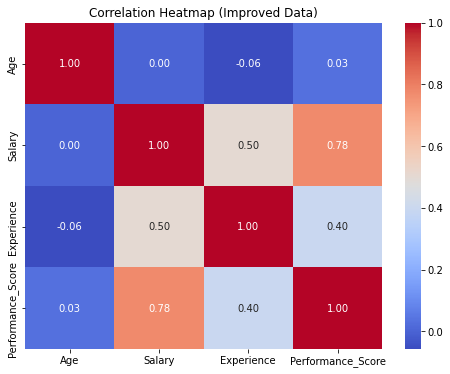

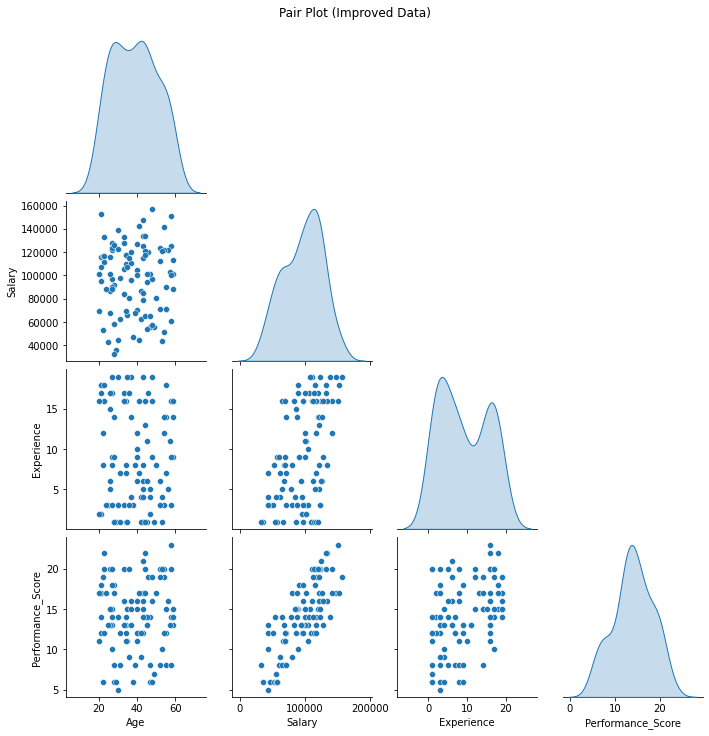

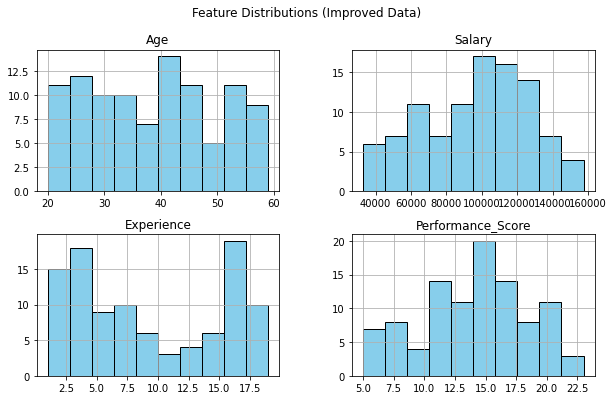

In [4]:
# Creating a more realistic dataset with meaningful correlations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(42)

# Generate data
improved_data = pd.DataFrame({
    'Age': np.random.randint(20, 60, size=100),
    'Salary': np.random.randint(30000, 120000, size=100),
    'Experience': np.random.randint(1, 20, size=100),
    'Education_Level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=100),
    'Department': np.random.choice(['HR', 'IT', 'Sales', 'Finance'], size=100),
    'Performance_Score': np.random.randint(1, 10, size=100)
})

# Introduce correlations manually
improved_data['Salary'] += improved_data['Experience'] * 2000  # Correlation between Salary and Experience
improved_data['Performance_Score'] += (improved_data['Salary'] / 10000).astype(int)  # Correlation with Salary

# Step 5: Apply Polynomial Features
df_encoded['Age_squared'] = df_encoded['Age'] ** 2

# Step 6: Log Transformation
df_encoded['Log_Salary'] = np.log(df_encoded['Salary'])

# Visualizations: Correlation heatmap and pairwise relationships
plt.figure(figsize=(8, 6))
sns.heatmap(improved_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Improved Data)")
plt.show()

sns.pairplot(improved_data, diag_kind='kde', corner=True)
plt.suptitle("Pair Plot (Improved Data)", y=1.02)
plt.show()

# Distribution Analysis (Histograms)
improved_data[['Age', 'Salary', 'Experience', 'Performance_Score']].hist(figsize=(10, 6), bins=10, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions (Improved Data)')
plt.show()
